Multivariate Linear Regression has multiple independent variables impacting the dependent variable

#### Using a dataset of fish species to predict weight using below features
#### Species: Species name of fish
#### Weight: Weight of fish in gram
#### Length1: Vertical length in cm
#### Length2: Diagonal length in cm
#### Length3: Cross length in cm
#### Height: Height in cm
#### Width: Diagonal width in cm

In [2]:
# Importing necessary Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
fish_data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')

In [4]:
# viewing our data
fish_data

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


In [6]:
# make a copy
fish_data1 = fish_data.copy()

In [7]:
fish_data.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [8]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [9]:
# checking the object values in Species
fish_data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
# checking for null values
fish_data.isna().sum()

Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64

In [12]:
# describing the dataset in horizontal orientation
fish_data.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


Exploratory Data Analysis

<AxesSubplot:xlabel='Species'>

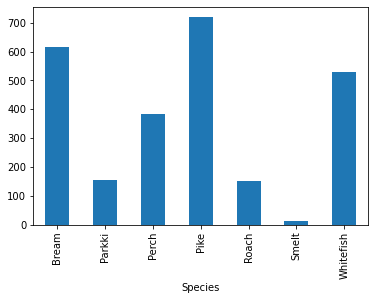

In [13]:
fish_data.groupby('Species').Weight.mean().plot(kind='bar')

In [14]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [15]:
# dropping Species as not needed
fish_data.drop('Species', axis = 1, inplace = True)

In [16]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Weight    159 non-null    float64
 2   Height    159 non-null    float64
 3   Width     159 non-null    float64
 4   Length1   159 non-null    float64
 5   Length2   159 non-null    float64
 6   Length3   159 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB


Feature Selection

<AxesSubplot:>

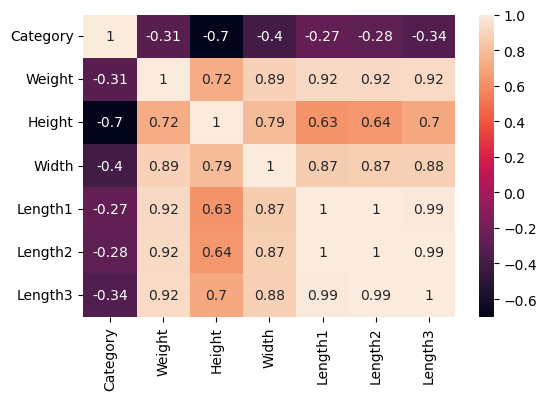

In [19]:
plt.figure(dpi=100) # size
sns.heatmap(fish_data.corr(), annot = True) # diagram
# heatmap show correlation between dep and indep variables
# width has high positive correlation 0.92 with the Length
# hence to improve model accuracy only one of the lengths is choosen avoiding multiple colinearity
# Multiple colinearity can affect model accuracy, L1,L2,L3 have high correlation with each other of 0.98
# But height and height has 0.72 and can coexist in the model as the range is from 0-1
# Only Weight and Length3 will be selected for my multiple linear regression.

Building our Model

In [20]:
# Splitting the dataset to independent variable X and target or dependent variable Y
X = fish_data.drop('Weight', axis = 1)
y = fish_data['Weight']

In [21]:
# Splitting the dataset X and y to training and testing data
# X to X_train, X_test and y to y_train, y_test
# 0.3 test size means 0.7 percent for training and 0.3 percent for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
X_train.head()

,Category,Height,Width,Length1,Length2,Length3
85,3,6.3840,3.5340,19.3,21.3,22.8
81,3,5.0820,2.7720,18.2,20.0,21.0
112,3,10.8810,6.8640,34.0,36.5,39.0
11,1,14.3714,4.8146,28.7,31.0,36.2
109,3,10.0300,6.0180,30.5,32.8,34.0


Scaling independent variables X

In [26]:
# Scaling the dataset to fit between 0-1 or 0-100
# X_train and X_test are pandas DataFrame and have a column structure
my_scaler = MinMaxScaler() # instantiate the scaler
X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.fit_transform(X_test)

In [27]:
# the transformed data (X_train_scaled and X_test_scaled) is a NumPy array and does not have column names.
X_train_scaled

array([[0.33333333, 0.26262518, 0.35888255, 0.22912621, 0.23454545,
        0.23648649],
       [0.33333333, 0.18501431, 0.24424954, 0.20776699, 0.21090909,
        0.20608108],
       [0.33333333, 0.5306867 , 0.85983783, 0.51456311, 0.51090909,
        0.51013514],
       [0.        , 0.73874583, 0.5515322 , 0.41165049, 0.41090909,
        0.46283784],
       [0.33333333, 0.47995947, 0.73256811, 0.44660194, 0.44363636,
        0.42567568],
       [0.16666667, 0.49878398, 0.37837919, 0.26601942, 0.26545455,
        0.28716216],
       [0.33333333, 0.62652599, 0.96992764, 0.65242718, 0.64727273,
        0.63851351],
       [0.        , 0.86664282, 0.70752035, 0.48932039, 0.50181818,
        0.55236486],
       [0.83333333, 0.        , 0.02057978, 0.06407767, 0.05272727,
        0.06418919],
       [0.33333333, 0.5933834 , 0.92199841, 0.62718447, 0.62909091,
        0.61486486],
       [0.66666667, 0.24973176, 0.33807711, 0.22524272, 0.22545455,
        0.24155405],
       [0.        , 0

In [28]:
# To preserve the column structure of the original pandas DataFrame (X_train and X_test)
# we need to convert the scaled data back into a DataFrame and reassign the column names

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [31]:
# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
# Instantiating the model
my_model = LinearRegression()

In [33]:
# fit the model on the X_train and y_train dataset
my_model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# predicting target value of y_pred to compare with true value y_test
y_pred = my_model.predict(X_test_scaled)

In [35]:
# testing our model performance
# Calculate the error of prediction y_pred from the true or target y_test
mean_absolute_err = mean_absolute_error(y_test, y_pred)
mean_squared_err = mean_squared_error(y_test, y_pred)

In [36]:
print(f"The mean absolute error is: {mean_absolute_err:.2f}")
print(f"The mean squared error is: {np.sqrt(mean_squared_err):.2f}")  # RMSE
print(f"The coefficient of determination is: {r2_score(y_test, y_pred):.2f}")

The mean absolute error is: 106.93
The mean squared error is: 143.32
The coefficient of determination is: 0.83


We have seen that multivariate Linear Regression performed better than univariate due to many independent variable as opposed to a single independent variable